# Bonus Example: Making the logo

This example is a worked example of how to take an image and create a point representation of the image. We're testing this on the logo, but you could try it on any image -- high contrast images work best.

In [104]:
import numpy as np

# image handling library
from PIL import Image

# useful for defining the pdf
from scipy.interpolate import RegularGridInterpolator

# plotting imports
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# lintsampler itself
from lintsampler import LintSampler


First, we'll bring in an image. 

In [105]:

# Load the logo image
image_path = '../assets/lintsamplertext.png'
image = Image.open(image_path)

# convert the image to greyscale
grayscale_image = image.convert('L')
grayscale_array = np.array(grayscale_image)


Let's take a look at the image. We'll hide the axes.

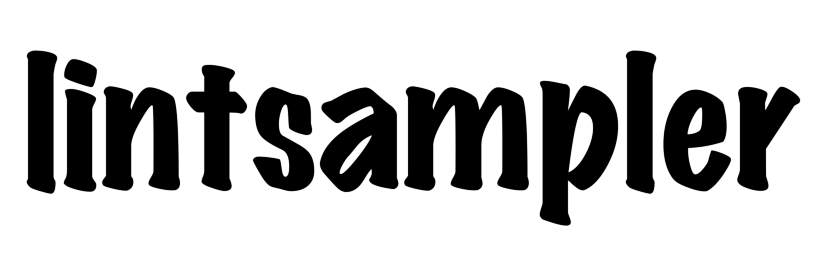

In [106]:
fig, ax = plt.subplots(figsize=(8,3))

# hide the axes
ax.axis('off')

ax.imshow(grayscale_array,cmap=cm.Greys_r)

ax.set_position([0, 0, 1, 1])


Next, we'll create a linear interpolation of the image. You could try a different interpolation strategy.

In [107]:

# Get the dimensions of the image
height, width = grayscale_array.shape[:2]

# Create the interpolation object
interpolator = RegularGridInterpolator((np.arange(0, height), np.arange(0, width)), grayscale_array, method='linear')


For input to `LintSampler`, we need a pdf function. In this case, we'll construct a pdf from the interpolated object. In order to sample the positive space, we will reverse the colour scheme. If one wanted to invert the image, with lighter areas in the input image being more likely to be sampled, one can choose `positive=False` (see below to pass in as `pdf_kwargs`.).

In [108]:
# Define a function to query the interpolated image
def query_image(X,positive=True):
    xi,yi = X
    if positive:
        return 255.-interpolator((yi, xi))
    else:
        return interpolator((yi, xi))


Now we are ready to construct the `LintSampler` object. For expediency, we will downsample the image, but one could also sample at full resolution.

In [109]:
xvals,yvals = np.arange(1.,width,5.),np.arange(1.,height,5.0),

L = LintSampler((xvals,yvals),pdf=query_image,pdf_kwargs={'positive': True})


Finally, we will sample the points and 

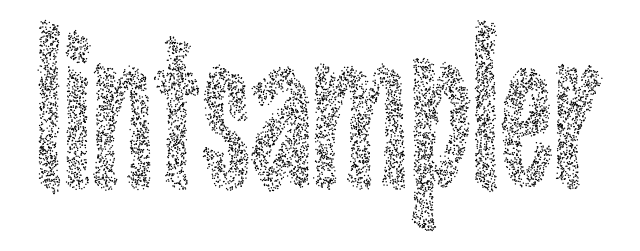

In [110]:
X = L.sample(N=10000)

fig, ax = plt.subplots(figsize=(8,3))

# hide the axes
ax.axis('off')

# reverse the y-coordinate for image-handling convention
ax.scatter(X[:,0],-X[:,1], edgecolor='none', facecolor='black',s=1.)


And that's it! We've now created a point representation of the image.